In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_V2.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


# Feature Descriptions

* **DBNOs** - Number of enemy players knocked.<br>
* **assists** - Number of enemy players this player damaged that were killed by teammates.<br>
* **boosts** - Number of boost items used.<br>
* **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.<br>
* **headshotKills** - Number of enemy players killed with headshots.<br>
* **heals** - Number of healing items used.<br>
* **Id** - Player’s Id<br>
* **killPlace** - Ranking in match of number of enemy players killed.<br>
* **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.<br>
* **killStreaks** - Max number of enemy players killed in a short amount of time.<br>
* **kills** - Number of enemy players killed.<br>
* **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.<br>
* **matchDuration** - Duration of match in seconds.<br>
* **matchId** - ID to identify match. There are no matches that are in both the training and testing set.<br>
* **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.<br>
* **rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.<br>
* **revives** - Number of times this player revived teammates.<br>
* **rideDistance** - Total distance traveled in vehicles measured in meters.<br>
* **roadKills** - Number of kills while in a vehicle.<br>
* **swimDistance** - Total distance traveled by swimming measured in meters.<br>
* **teamKills** - Number of times this player killed a teammate.<br>
* **vehicleDestroys** - Number of vehicles destroyed.<br>
* **walkDistance** - Total distance traveled on foot measured in meters.<br>
* **weaponsAcquired** - Number of weapons picked up.<br>
* **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.<br>
* **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.<br>
* **numGroups** - Number of groups we have data for in the match.<br>
* **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.<br>
* **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.<br>

In [4]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


## Missing Data

In [6]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
# take a look at that row
train[train['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [4]:
# delete this row
train.drop(2744604, inplace=True)

In [53]:
# check the data again
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# EDA

### Kills

In [6]:
train['kills'].describe()

count    4.446966e+06
mean     9.247833e-01
std      1.558445e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.200000e+01
Name: kills, dtype: float64

In [7]:
print('The average number of kills is {:.4f}. 99% players have {} kills or less. The most kills ever is {:.0f}.'
      .format(train['kills'].mean(), train['kills'].quantile(0.99), train['kills'].max()))

The average number of kills is 0.9248. 99% players have 7.0 kills or less. The most kills ever is 72.


Text(0.5,1,'Kill Count')

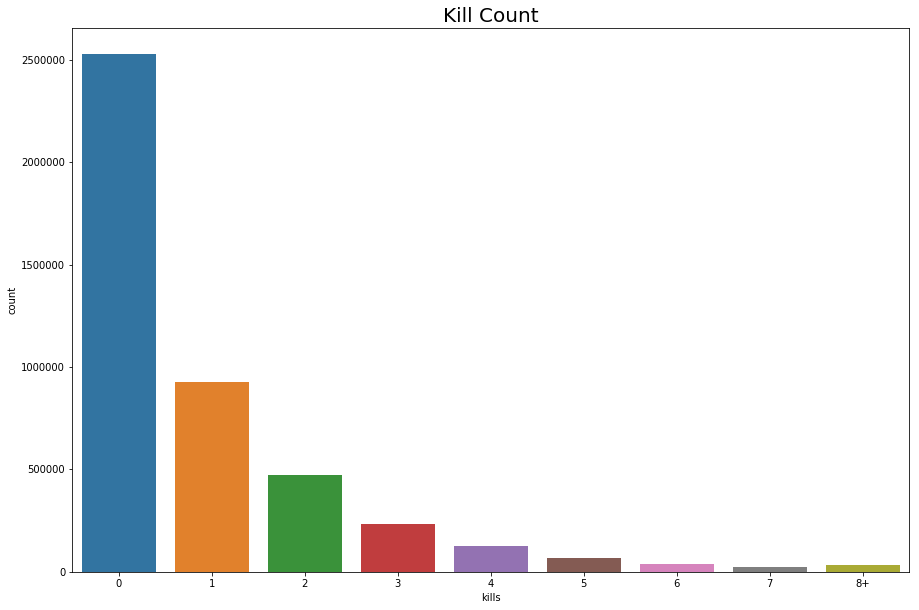

In [8]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15, 10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title('Kill Count', fontsize=20)

Most players can't even kill an enemy
Let's check how much damage they did before they die

Text(0.5,1,'Damage dealt by Player who killed 0 enemy')

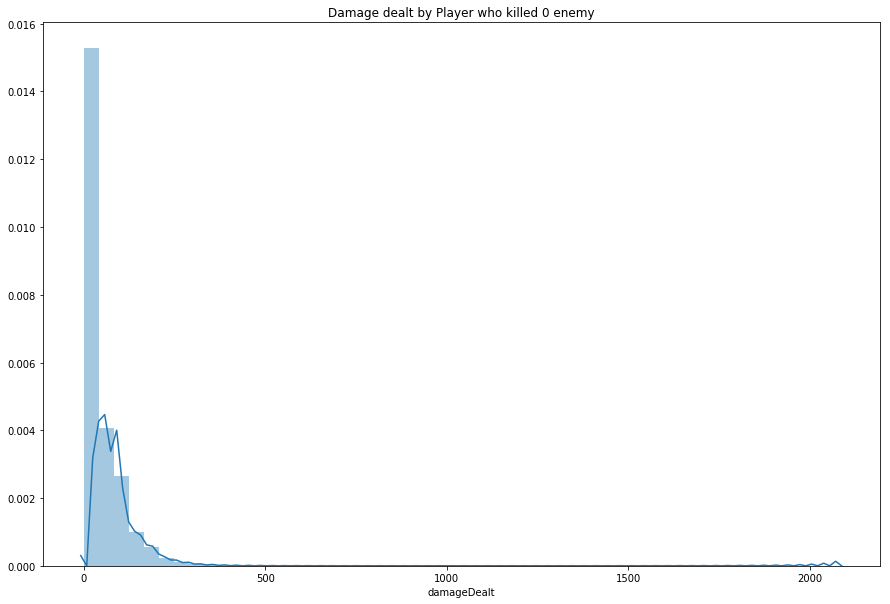

In [9]:
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15, 10))
sns.distplot(data['damageDealt'])
plt.title('Damage dealt by Player who killed 0 enemy')

In [10]:
data['damageDealt'].describe()

count    2.529722e+06
mean     4.067796e+01
std      5.841843e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.050000e+01
75%      6.832000e+01
max      2.079000e+03
Name: damageDealt, dtype: float64

About 50% 0 killers dealt 10 damage or less

In [11]:
print('{:.0f} zero-killers ({:.4%}) won the game.'
     .format(len(data[data['winPlacePerc']==1]), len(data[data['winPlacePerc']==1])/len(data)))

print('{:.0f} zero-killers ({:.4%}) won the game with 0 damage dealt.'
     .format(len(data[(data['winPlacePerc']==1) & (data['damageDealt']==0)]),
             len(data[(data['winPlacePerc']==1) & (data['damageDealt']==0)])/len(data)))

16666 zero-killers (0.6588%) won the game.
4709 zero-killers (0.1861%) won the game with 0 damage dealt.


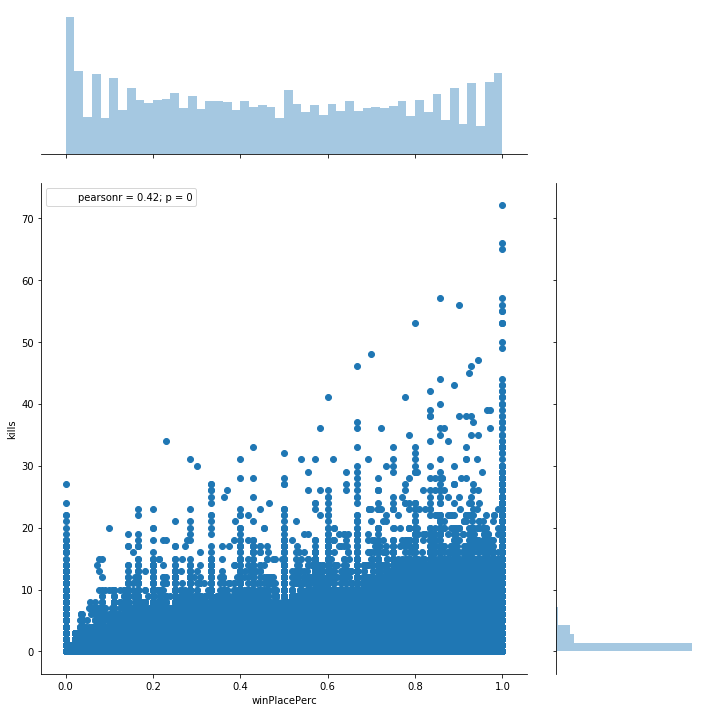

In [14]:
sns.jointplot(data=train, x='winPlacePerc', y='kills', size=10, ratio=3)

kills correlated to winPlacePerc

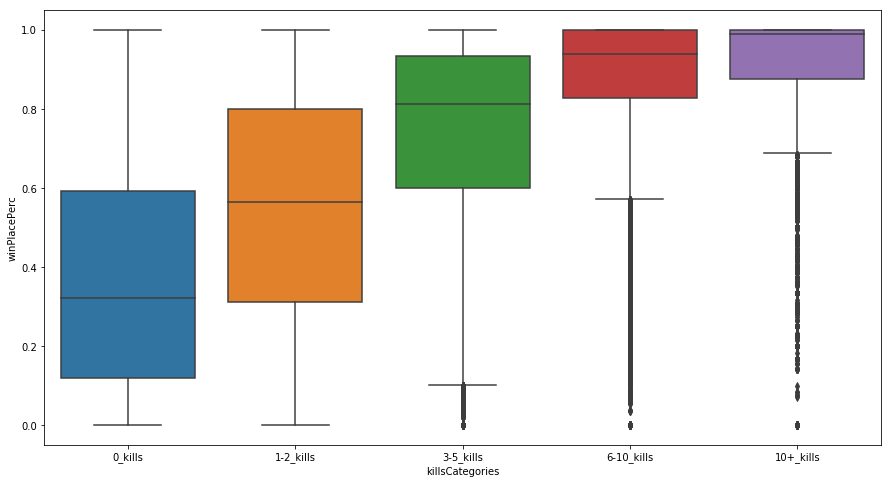

In [18]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 100], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)

### Running

In [19]:
train['walkDistance'].describe()

count    4.446966e+06
mean     1.154218e+03
std      1.183497e+03
min      0.000000e+00
25%      1.551000e+02
50%      6.856000e+02
75%      1.976000e+03
max      2.578000e+04
Name: walkDistance, dtype: float64

In [20]:
print('The average walking distance is {:.1f}m. 99% players walked {:.1f}m or less. The max distance is {:.1f}m.'
     .format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))

The average walking distance is 1154.2m. 99% players walked 4396.0m or less. The max distance is 25780.0m.


Text(0.5,1,'Walking Distance')

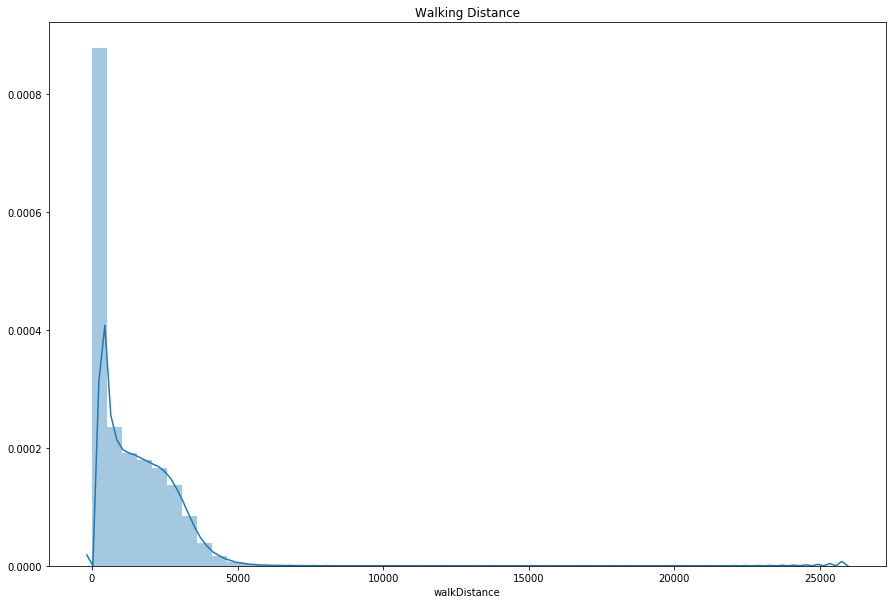

In [21]:
data = train.copy()
plt.figure(figsize=(15, 10))
sns.distplot(data['walkDistance'])
plt.title('Walking Distance')

In [22]:
print('{:.0f} ({:.4%}) players walked 0 meter. That means they died just reached the ground or afk.'
     .format(len(data[data['walkDistance']==0]), len(data[data['walkDistance']==0])/len(data)))

99603 (2.2398%) players walked 0 meter. That means they died just reached the ground or afk.


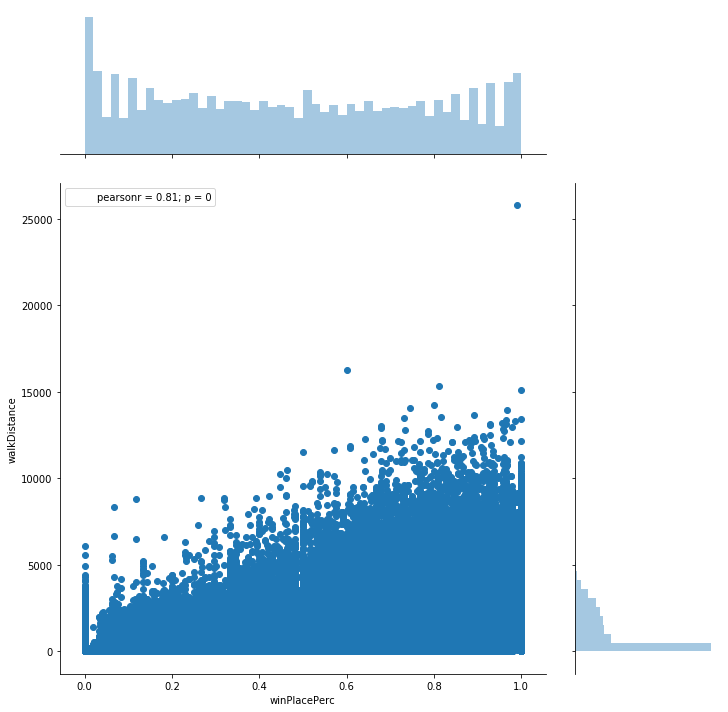

In [23]:
sns.jointplot(data=train, x='winPlacePerc', y='walkDistance', size=10, ratio=3)

Walking Distance has a high correlation with WinPlacePerc.

### Driving Distance

In [24]:
train['rideDistance'].describe()

count    4.446966e+06
mean     6.061157e+02
std      1.498344e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.909750e-01
max      4.071000e+04
Name: rideDistance, dtype: float64

At least 50% players didn't drive a vehicle

In [26]:
print("The average riding distance is {:.1f}m. 99% players drived {:.1f}m or less. The max driving distance is {:.1f}m."
     .format(data['rideDistance'].mean(), data['rideDistance'].quantile(0.99), data['rideDistance'].max()))

The average riding distance is 606.1m. 99% players drived 6966.0m or less. The max driving distance is 40710.0m.


Text(0.5,1,'Ride Distance')

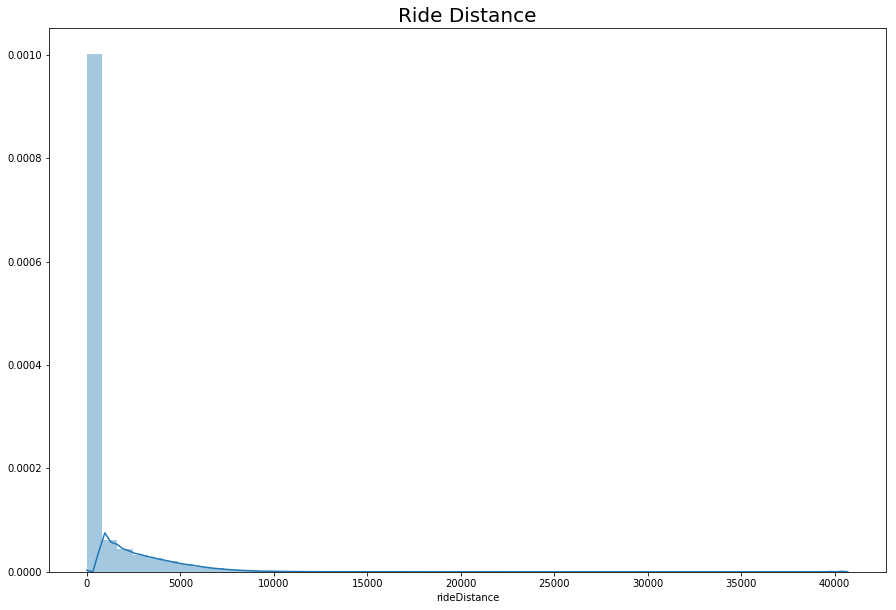

In [28]:
data = train.copy()
plt.figure(figsize=(15, 10))
sns.distplot(data['rideDistance'])
plt.title('Ride Distance', fontsize=20)

In [29]:
print('{:0f} players ({:.4%}) drived for 0 meter.'
     .format(len(data[data['rideDistance']==0]), len(data[data['rideDistance']==0])/len(data)))

3309429.000000 players (74.4199%) drived for 0 meter.


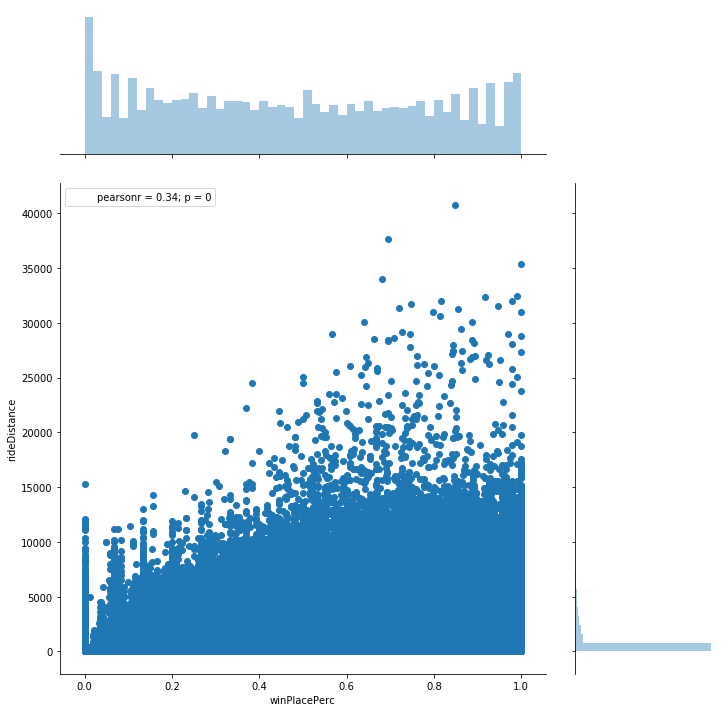

In [30]:
sns.jointplot(data=train, x='winPlacePerc', y='rideDistance', size=10, ratio=3)

small correlation

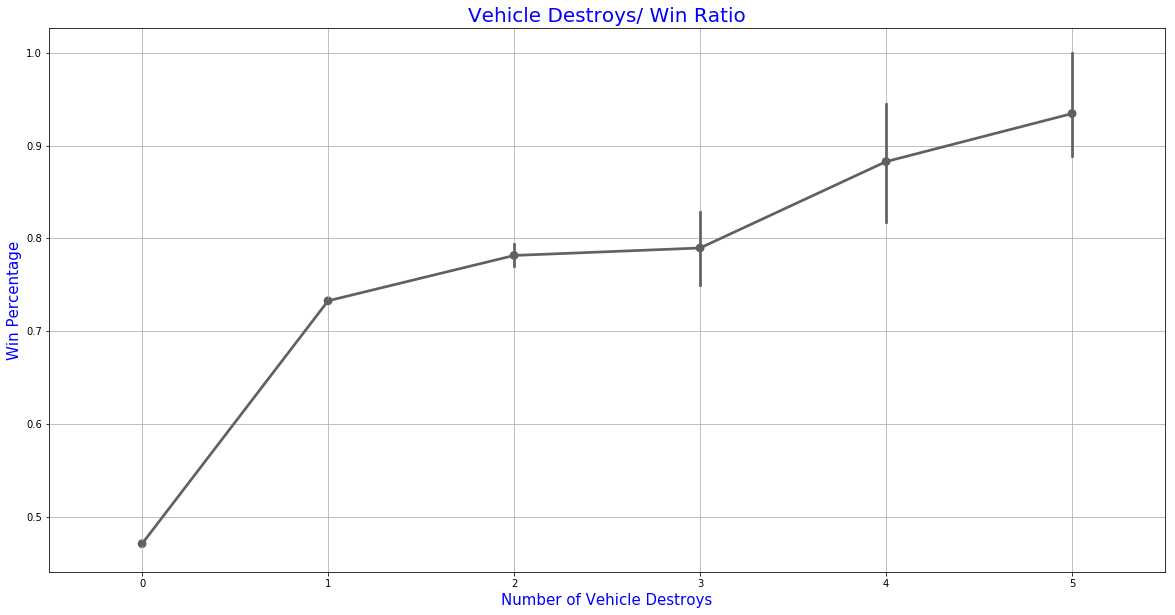

In [31]:
f, ax1 = plt.subplots(figsize=(20, 10))
sns.pointplot(x='vehicleDestroys', y='winPlacePerc', data=data, color='#606060', alpha=0.8)
plt.xlabel('Number of Vehicle Destroys', fontsize=15, color='blue')
plt.ylabel('Win Percentage', fontsize=15, color='blue')
plt.title('Vehicle Destroys/ Win Ratio', fontsize=20, color='blue')
plt.grid()

destroying vehicle increases the chance to win

### Swimming

In [3]:
print('The average swim distance is {:.1f}m. 99% players swam {:.1f}m or less. The max swim distance is {:.1f}m'
     .format(train['swimDistance'].mean(), train['swimDistance'].quantile(0.99), train['swimDistance'].max()))

The average swim distance is 4.5m. 99% players swam 123.0m or less. The max swim distance is 3823.0m


In [4]:
train['swimDistance'].describe()

count    4.446966e+06
mean     4.509322e+00
std      3.050220e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.823000e+03
Name: swimDistance, dtype: float64

At least 75% players didn't swim

Text(0.5,1,'Swim Distance Distribution')

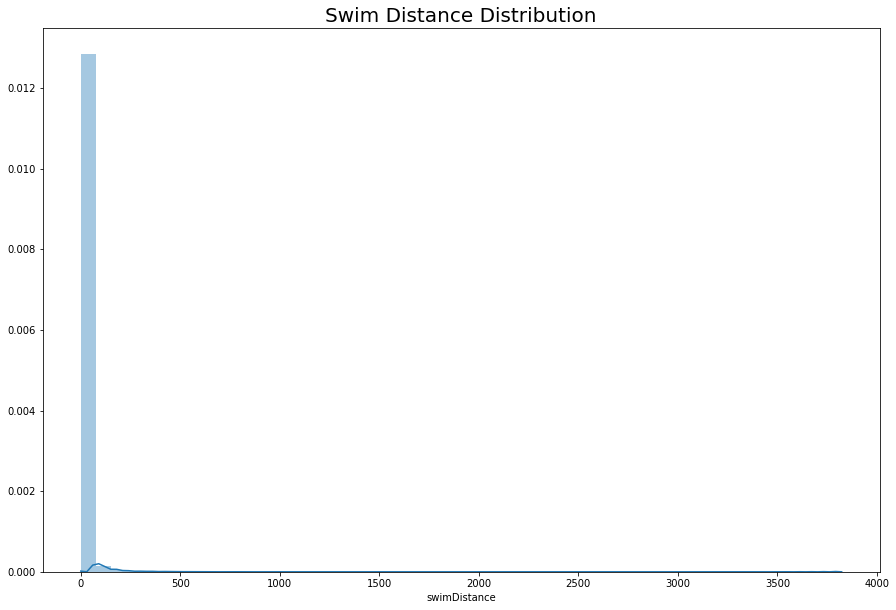

In [5]:
plt.figure(figsize=(15, 10))
sns.distplot(train['swimDistance'])
plt.title('Swim Distance Distribution', fontsize=20)

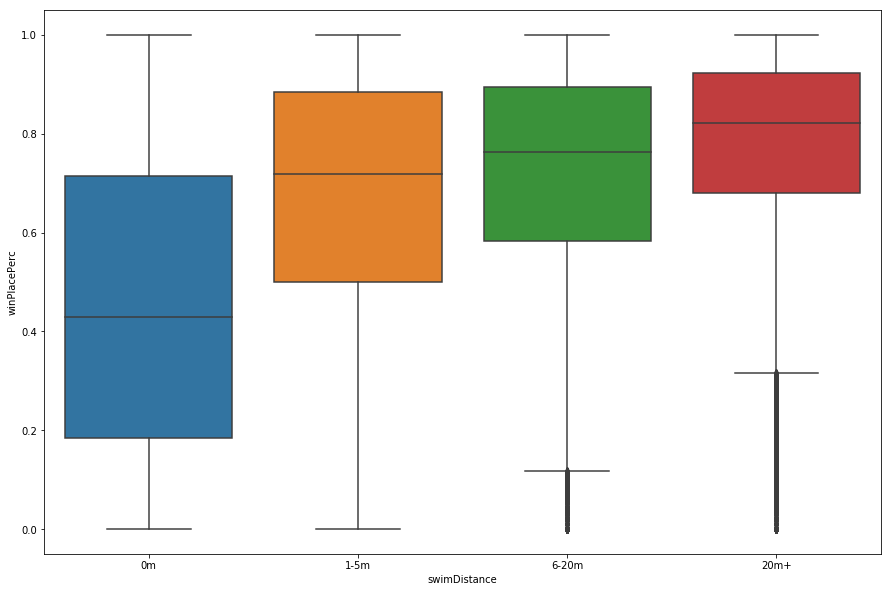

In [6]:
data = train.copy()
data['swimDistance'] = pd.cut(data['swimDistance'], [-1, 0, 5, 20, 5000], labels=['0m', '1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='swimDistance', y='winPlacePerc')

### Healing

In [10]:
print('The average number of heal items used is {:.1f}. 99% players used {:.1f} or less. Max number of used heal items is {:.0f}.'
     .format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print('')
print('The average number of boost items used is {:.1f}. 99% players used {:.1f} or less. Max number of used boost items is {:.0f}.'
     .format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

The average number of heal items used is 1.4. 99% players used 12.0 or less. Max number of used heal items is 80.

The average number of boost items used is 1.1. 99% players used 7.0 or less. Max number of used boost items is 33.


In [16]:
train[['heals', 'boosts']].describe()

,heals,boosts
count,4.446966e+06,4.446966e+06
mean,1.370147e+00,1.106908e+00
std,2.679982e+00,1.715794e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00
max,8.000000e+01,3.300000e+01


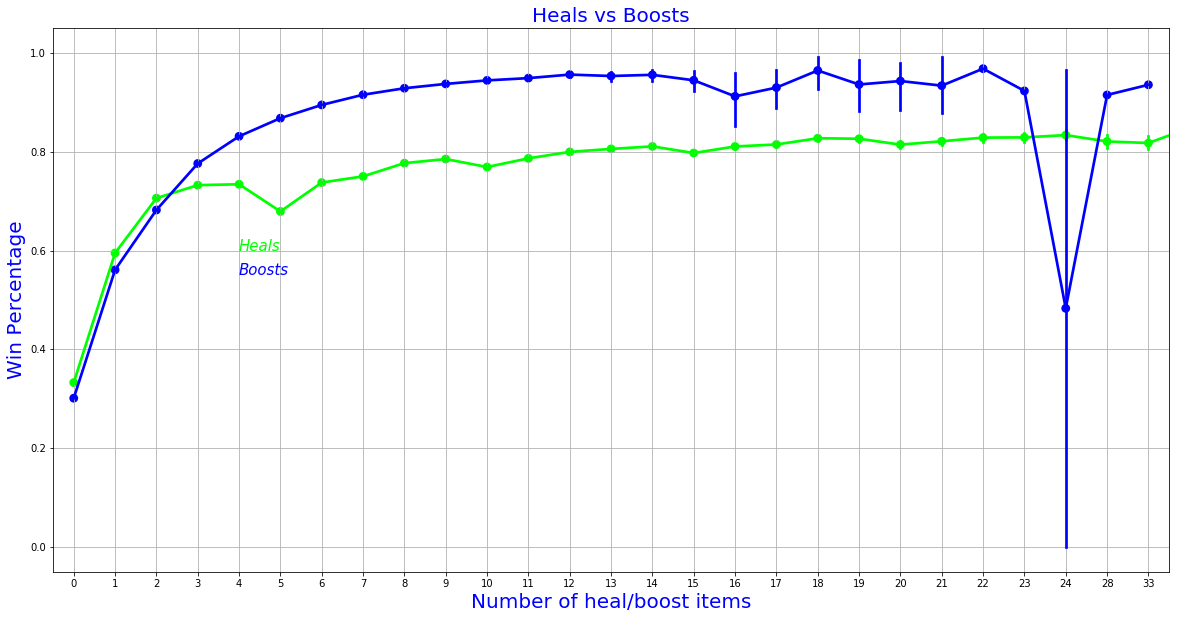

In [17]:
data = train.copy()

f, ax1 = plt.subplots(figsize=(20, 10))
sns.pointplot(data=data, x='heals', y='winPlacePerc', color='lime', alpha=0.8)
sns.pointplot(data=data, x='boosts', y='winPlacePerc', color='blue', alpha=0.8)
plt.text(4, 0.6, 'Heals', color='lime', fontsize=15, style='italic')
plt.text(4, 0.55, 'Boosts', color='blue', fontsize=15, style='italic')
plt.xlabel('Number of heal/boost items', fontsize=20, color='blue')
plt.ylabel('Win Percentage', fontsize=20, color='blue')
plt.title('Heals vs Boosts', fontsize=20, color='blue')
plt.grid()

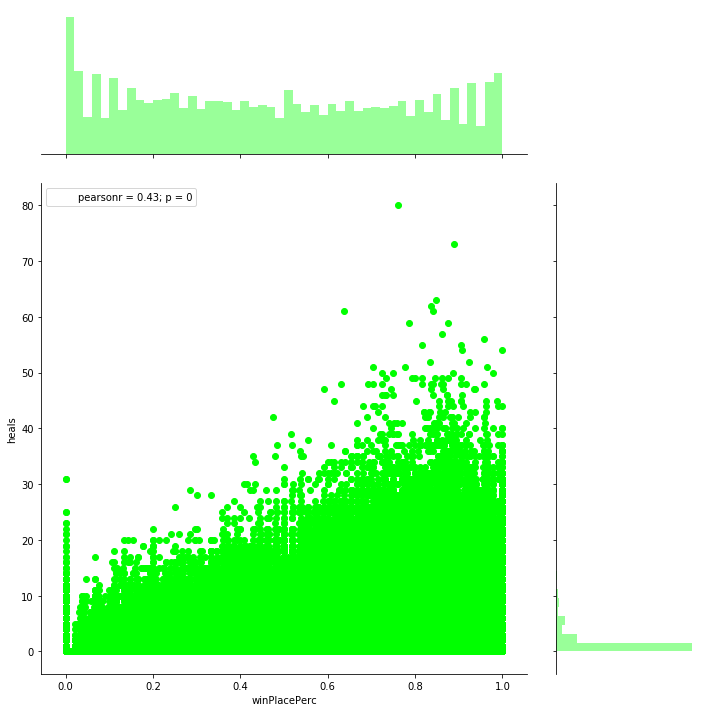

In [19]:
sns.jointplot(data=data, x='winPlacePerc', y='heals', size=10, ratio=3, color='lime')

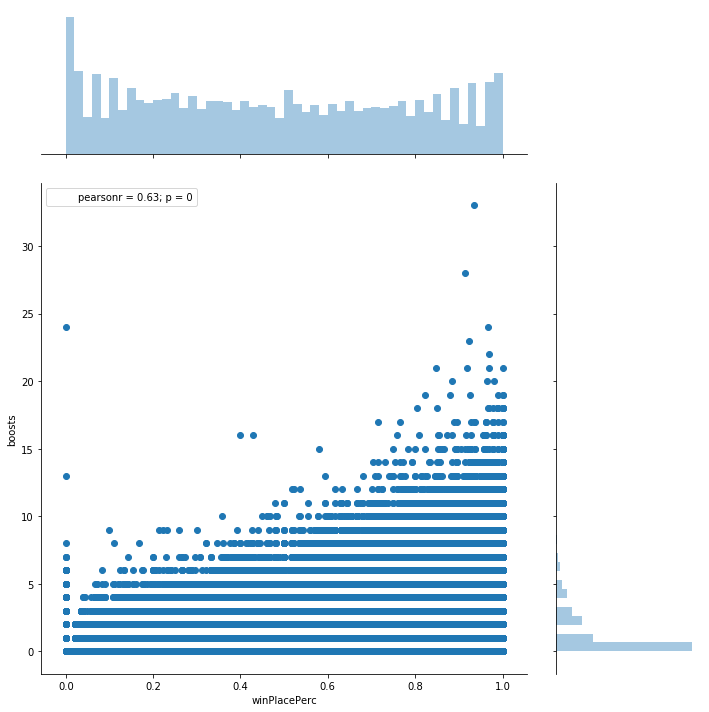

In [20]:
sns.jointplot(data=data, x='winPlacePerc', y='boosts', size=10, ratio=3)

healing and boosting have a high correlation with winPlacePerc

### Solos, Duos, Squads

In [3]:
# seperate the train data into solos, duos, squads
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<50)]
squads = train[train['numGroups']<=25]

print('There are {} ({:.2%}) solo games, {} ({:.2%}) duo games and {} ({:.2%}) squads games.'
     .format(len(solos), len(solos)/len(train), len(duos), len(duos)/len(train), len(squads), len(squads)/len(train)))

There are 709111 (15.95%) solo games, 3270903 (73.55%) duo games and 442529 (9.95%) squads games.


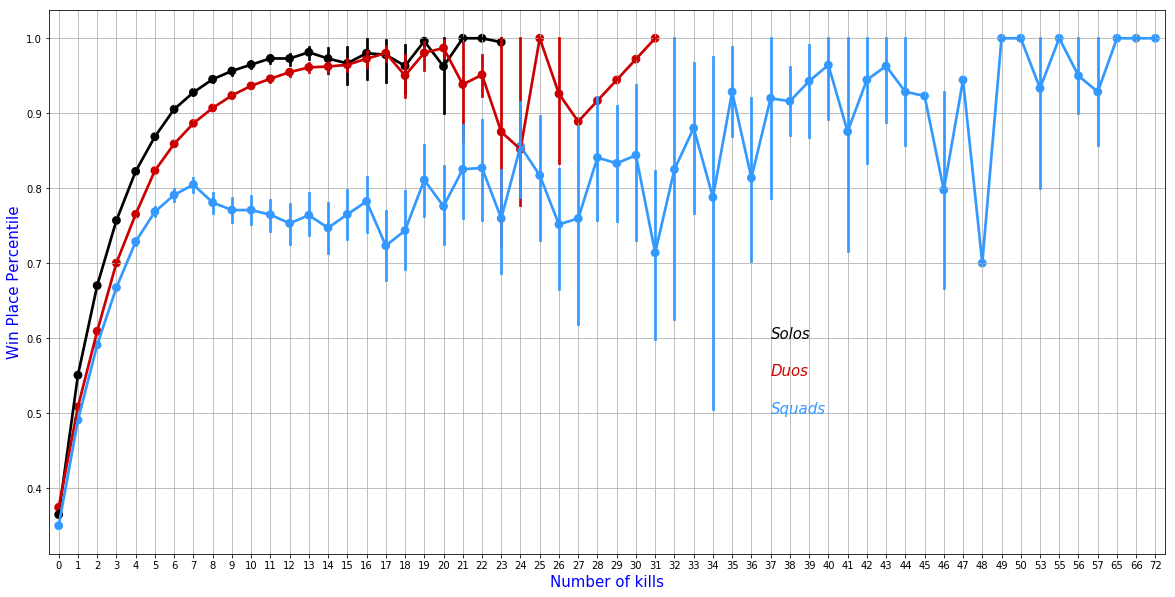

In [23]:
f, ax1 = plt.subplots(figsize=(20, 10))
sns.pointplot(data=solos, x='kills', y='winPlacePerc', color='black', alpha=0.8)
sns.pointplot(data=duos, x='kills', y='winPlacePerc', color='#CC0000', alpha=0.8)
sns.pointplot(data=squads, x='kills', y='winPlacePerc', color='#3399FF', alpha=0.8)
plt.text(37, 0.6, 'Solo', color='black', fontsize=15, style='italic')
plt.text(37, 0.55, 'Duo', color='#CC0000', fontsize=15, style='italic')
plt.text(37, 0.5, 'Squad', color='#3399FF', fontsize=15, style='italic')

plt.xlabel('Number of kills', fontsize=15, color='blue')
plt.ylabel('Win Place Percentile', fontsize=15, color='blue')
plt.title('Solo vs Duo vs Squad Kills', size=20, color='blue')
plt.grid()

Solos and duos behave alike, kills may be a good indicator to win or not<br>
total different story for squads, kills may not play an important role

DBNOs means number of enemies the player knocked down. That happens only when the enemy has teammate(s) to revive the knocked player. In other words, the attribute DBNOs can happen only in duos or squads.

The attribute assists can also happen only in duos or squads.

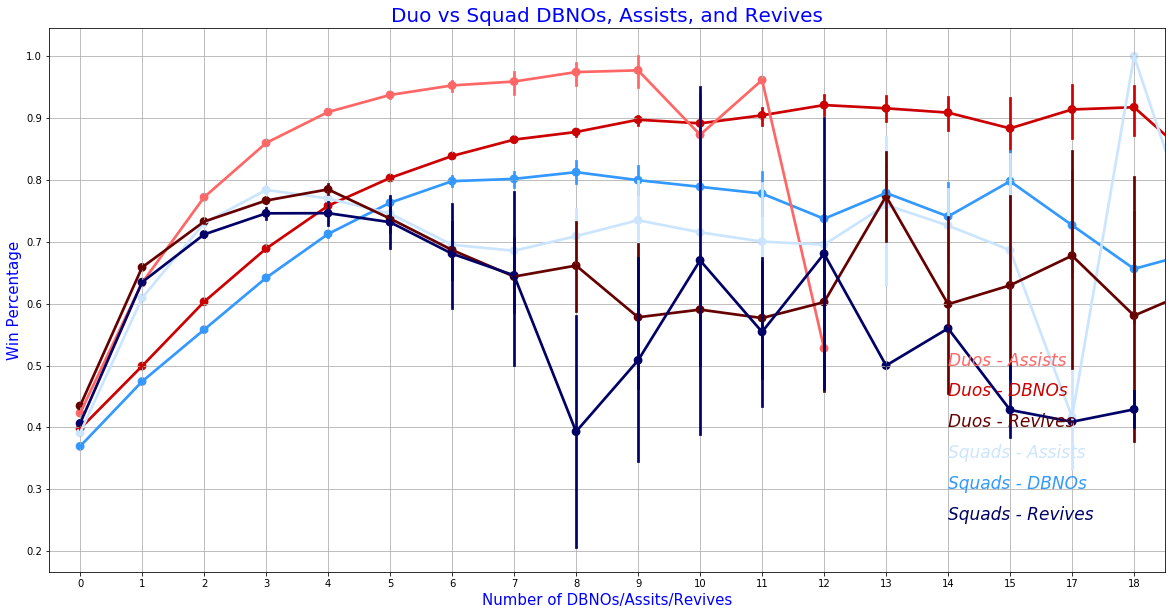

In [5]:
f, ax = plt.subplots(figsize=(20, 10))
# DBNOs
sns.pointplot(data=duos, x='DBNOs', y='winPlacePerc', color='#CC0000', alpha=0.8)
sns.pointplot(data=squads, x='DBNOs', y='winPlacePerc', color='#3399FF', alpha=0.8)
# assists
sns.pointplot(data=duos, x='assists', y='winPlacePerc', color='#FF6666', alpha=0.8)
sns.pointplot(data=squads, x='assists', y='winPlacePerc', color='#CCE5FF', alpha=0.8)
# revives
sns.pointplot(data=duos, x='revives', y='winPlacePerc', color='#660000', alpha=0.8)
sns.pointplot(data=squads, x='revives', y='winPlacePerc', color='#000066', alpha=0.8)
# texts
plt.text(14, 0.5, 'Duos - Assists', color='#FF6666', fontsize=17, style='italic')
plt.text(14, 0.45, 'Duos - DBNOs', color='#CC0000', fontsize=17, style='italic')
plt.text(14, 0.4, 'Duos - Revives', color='#660000', fontsize=17, style='italic')
plt.text(14, 0.35, 'Squads - Assists', color='#CCE5FF', fontsize=17, style='italic')
plt.text(14, 0.3, 'Squads - DBNOs', color='#3399FF', fontsize=17, style='italic')
plt.text(14, 0.25, 'Squads - Revives', color='#000066', fontsize=17, style='italic')
# labels
plt.xlabel('Number of DBNOs/Assits/Revives', fontsize=15, color='blue')
plt.ylabel('Win Percentage', fontsize=15, color='blue')
plt.title('Duo vs Squad DBNOs, Assists, and Revives', fontsize=20, color='blue')
plt.grid()

### Pearson Correlation between variables

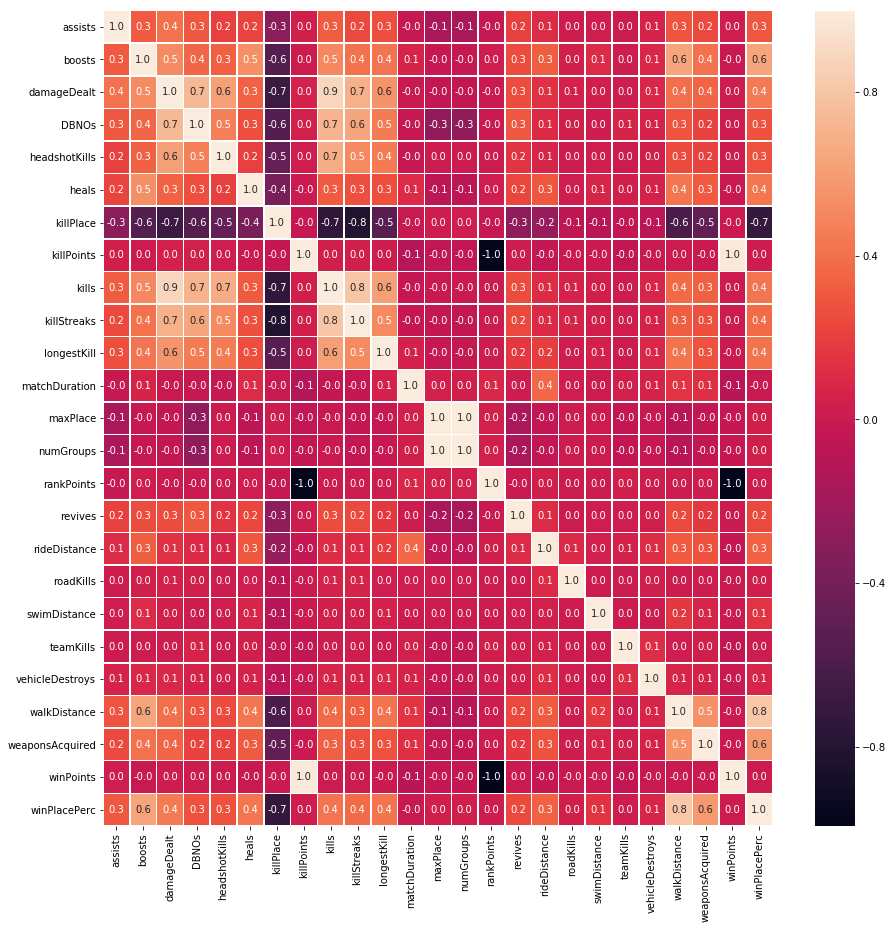

In [8]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidth=0.5, fmt='.1f')

In terms of the target variable(winPlacePerc), there are a few variables having high correlation.<br>

The highest positive correlation is walkDistance, while the highest negative one is killPlace.

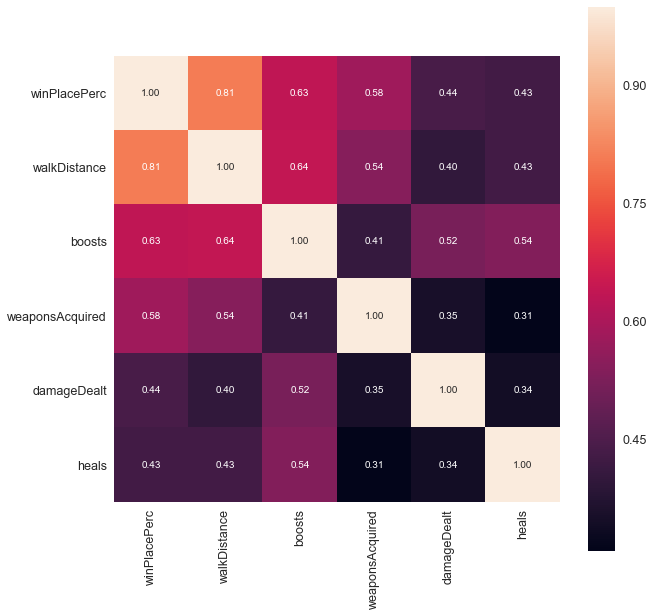

In [16]:
# top 5 most positive correlated variables
k = 6
f, ax = plt.subplots(figsize=(10, 10))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = train[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

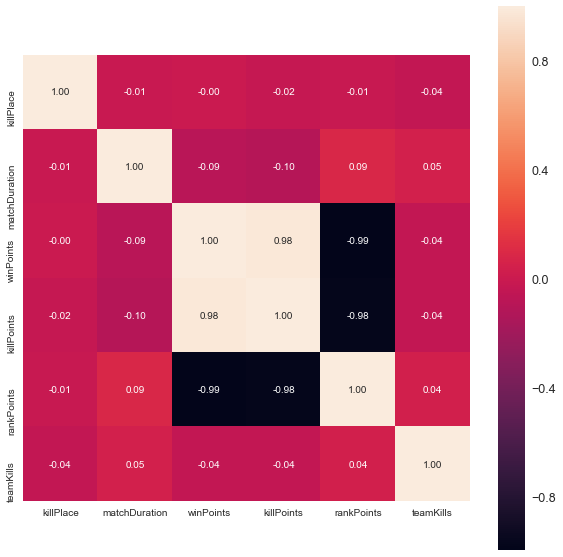

In [20]:
# top 5 most negative correlated variables
k = 6
f, ax = plt.subplots(figsize=(10, 10))
cols = train.corr().nsmallest(k, 'winPlacePerc')['winPlacePerc'].index
cm = train[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

## Feature Engineering

### Number of Players

In [5]:
train['num_players'] = train.groupby('matchId')['matchId'].transform('count')

Text(0.5,1,'Number of Players')

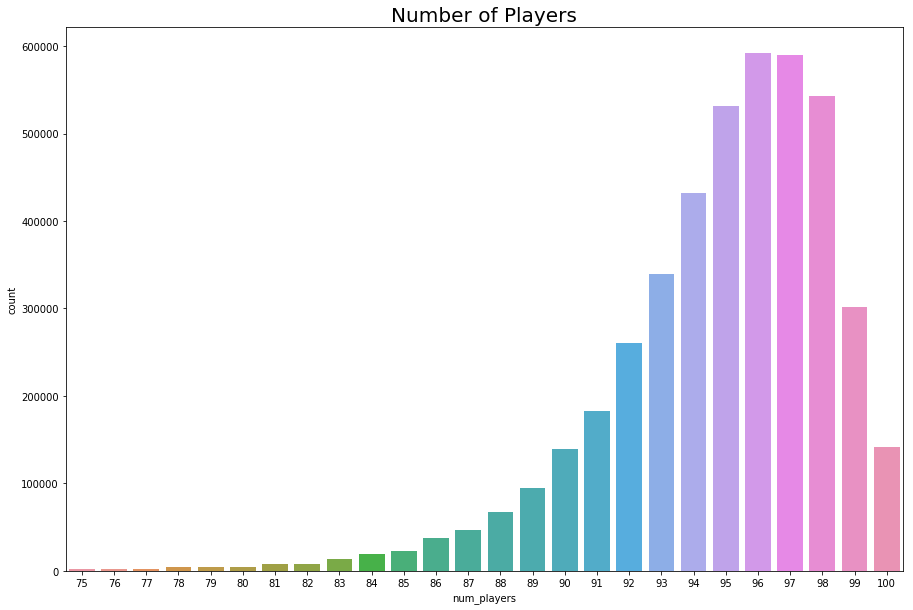

In [4]:
data = train.copy()
data = data[data['num_players']>=75]
plt.figure(figsize=(15, 10))
sns.countplot(data['num_players'])
plt.title('Number of Players', fontsize=20)

Normalize kills, damageDealt, maxPlace, matchDuration based on num_players

In [6]:
train['killsNorm'] = train['kills'] * ((100 - train['num_players']) / 100 + 1)
train['damageDealtNorm'] = train['damageDealt'] * ((100 - train['num_players']) / 100 + 1)
train['maxPlaceNorm'] = train['maxPlace'] * ((100 - train['num_players']) / 100 + 1)
train['matchDurationNorm'] = train['matchDuration'] * ((100 - train['num_players']) / 100 + 1)

train[['Id', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm',
       'matchDuration', 'matchDurationNorm']].head()

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.00,0.0000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.47,99.7023,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.00,69.3600,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.90,35.8610,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.00,103.0000,97,99.91,1424,1466.72


### heals and boosts, travel distance

In [7]:
train['healsAndBoosts'] = train['heals'] + train['boosts']
train['totalDistance'] = train['walkDistance'] + train['rideDistance'] + train['swimDistance']

In [8]:
# find out players who are getting kills without moving
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))

In [9]:
# create feature headshot_rate
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)

In [9]:
# # boosts
# train['boostsPerWalkDistance'] = train['boosts'] / (train['walkDistance'] + 1)
# train['boostsPerWalkDistance'].fillna(0, inplace=True)
# # heals
# train['healsPerWalkDistance'] = train['heals'] / (train['walkDistance'] + 1)
# train['healsPerWalkDistance'].fillna(0, inplace=True)
# # heals and boosts
# train['healsAndBoostsPerWalkDistance'] = train['healsAndBoosts'] / (train['walkDistance'] + 1)
# train['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)

# train[['walkDistance', 'boosts', 'boostsPerWalkDistance' ,'heals',  'healsPerWalkDistance', 'healsAndBoosts', 'healsAndBoostsPerWalkDistance']].head()

## Outlier Detection

remove data with anomal characteristics

### kills without movement

no movement & no kill => maybe just AFK<br>
no movement & get kills => likely a cheater

In [10]:
display(train[train['killsWithoutMoving'] == True].shape)
train[train['killsWithoutMoving'] == True].head(10)

(1535, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,num_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsAndBoosts,totalDistance,killsWithoutMoving,headshot_rate
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,0.8571,58,8.52,842.0600,21.30,842.06,3,0.0,True,0.000000
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.60,0,0,6,33,...,0.6000,42,4.74,547.6280,17.38,2834.52,6,0.0,True,0.000000
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,0.8947,21,35.80,3132.5000,35.80,1607.42,5,0.0,True,0.200000
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.80,0,0,0,69,...,0.0000,73,1.27,200.4060,24.13,1014.73,0,0.0,True,0.000000
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.00,0,1,0,37,...,0.3000,42,1.58,158.0000,17.38,2834.52,0,0.0,True,1.000000
20881,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.10,4,1,3,7,...,0.8000,44,9.36,789.5160,9.36,909.48,3,0.0,True,0.166667
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.00,0,4,1,7,...,0.6000,48,18.24,1708.4800,9.12,836.00,1,0.0,True,0.333333
24640,aeced11d46de19,d4009ffa95bb4f,73f3ed869c9171,2,0,529.90,0,2,11,12,...,0.8571,57,10.01,757.7570,21.45,856.57,11,0.0,True,0.285714
25659,6626c4d47cffa0,ee3fe5c0d917c3,341341834b7941,0,1,128.90,0,1,6,53,...,0.2857,61,2.78,179.1710,11.12,1017.48,7,0.0,True,0.500000
30079,869331b90bfa3f,869ea3ad036e53,fa373e28ff5062,0,0,85.56,0,0,0,46,...,0.8571,53,1.47,125.7732,22.05,1051.05,0,0.0,True,0.000000


In [10]:
# remove outliers
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

### Anomalies in roadKills

In [12]:
train['roadKills'].describe()

count    4.445431e+06
mean     3.497299e-03
std      7.338560e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.800000e+01
Name: roadKills, dtype: float64

at least 75% players got 0 road kill, but the max is 18

In [13]:
train['roadKills'].value_counts()

0     4432435
1       11247
2        1298
3         297
4          72
5          36
6          20
7          11
8           7
11          2
10          2
9           2
18          1
14          1
Name: roadKills, dtype: int64

In [11]:
# remove players with more than 10 roadKills
train.drop(train[train['roadKills'] > 10].index, inplace=True)

### Anomalies in aim (much more kills than others)

Text(0.5,1,'Kills')

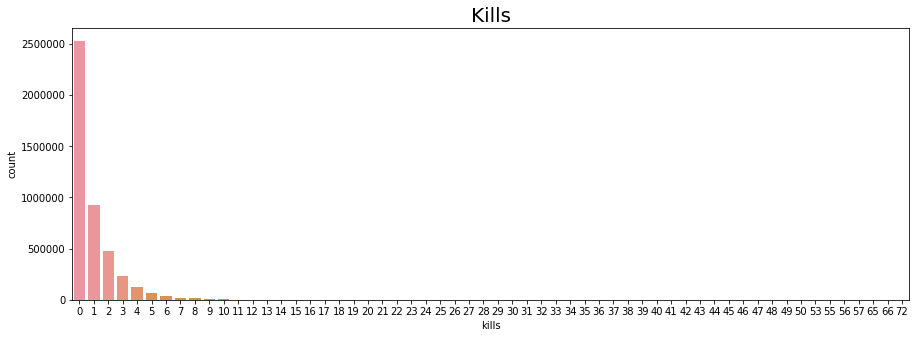

In [15]:
plt.figure(figsize=(15, 5))
sns.countplot(data=train, x='kills')
plt.title('Kills', fontsize=20)

In [16]:
# players who got more than 30 kills
display(train[train['kills'] > 30].shape)
train[train['kills'] > 30].head(10)

(95, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,num_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsAndBoosts,totalDistance,killsWithoutMoving,headshot_rate
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,0.8571,16,64.40,6854.00,14.72,3308.32,0,48.82,False,0.200000
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,1.0000,16,57.04,5680.08,14.72,3308.32,27,780.70,False,0.258065
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0.7000,11,90.72,10355.31,20.79,3398.22,7,23.71,False,0.250000
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,1.0000,62,57.96,5565.54,11.04,1164.72,0,718.30,False,0.952381
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,1.0000,11,66.15,5993.19,17.01,3394.44,15,71.51,False,0.171429
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,1.0000,11,122.85,12504.24,20.79,3398.22,5,1036.00,False,0.200000
353128,f3e9746e3ff151,4bc1f00f07b304,a9e84c456cc859,2,0,3834.0,0,9,5,1,...,1.0000,13,72.93,7169.58,24.31,3356.65,5,124.20,False,0.230769
457829,265e23756baa0b,9d94424171c2a1,664dee9ed8f646,3,0,2907.0,0,27,2,1,...,1.0000,38,53.46,4709.34,8.10,1339.74,2,382.40,False,0.818182
488335,31a0682922ef45,275a27a3ee4cc8,3037f74ef8a3a3,2,0,3055.0,0,9,0,1,...,1.0000,20,59.40,5499.00,32.40,1605.60,0,35.30,False,0.272727
662650,dd424a8b74bd49,ac9dea6d62f2e6,8a728def0644be,9,0,3454.0,38,9,4,1,...,0.2308,54,49.64,5042.84,20.44,1749.08,4,111.10,False,0.264706


In [12]:
# remove outliers
train.drop(train[train['kills'] > 30].index, inplace=True)

### Anomalies in aim (headshot script)

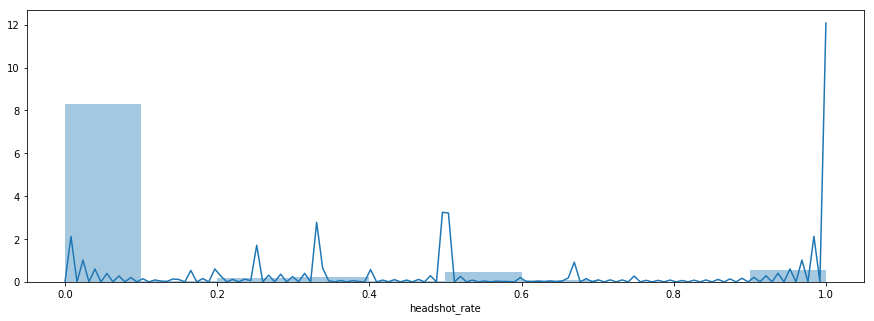

In [18]:
plt.figure(figsize=(15, 5))
sns.distplot(train['headshot_rate'], bins=10)

most players score in the 0%-10% region<br>
some players got 100% headshot rate

In [19]:
display(train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].shape)
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].head(10)

(24, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,num_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsAndBoosts,totalDistance,killsWithoutMoving,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0.8462,93,10.70,1296.84,28.89,1522.61,3,2939.0,False,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,1.0000,96,11.44,1684.80,28.08,1796.08,8,8142.0,False,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,1.0000,98,13.26,1392.30,27.54,1280.10,4,2105.0,False,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0.9630,95,10.50,1611.75,29.40,1929.90,8,7948.0,False,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,1.0000,96,10.40,1409.20,28.08,1473.68,8,3476.0,False,1.0
1079403,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,1.0000,95,11.55,1278.90,29.40,1912.05,8,8178.0,False,1.0
1167959,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,1,...,1.0000,97,10.30,1096.95,27.81,1283.38,5,2858.9,False,1.0
1348164,474a641f0a4bcb,2fdad3ca6fb3c0,114499c82f35d7,1,5,1319.0,11,12,1,1,...,1.0000,93,12.84,1411.33,29.96,1851.10,6,5963.0,False,1.0
1380385,202ce6a55119c5,2df66861f597b4,496700c29a5d44,1,4,1150.0,4,11,1,1,...,1.0000,88,12.32,1288.00,51.52,1397.76,5,3108.0,False,1.0
1483199,9d483f7cbb34d4,db5867bc814191,69495e3c478eb9,0,10,1478.0,8,13,2,1,...,1.0000,96,13.52,1537.12,50.96,1434.16,12,2479.8,False,1.0


other data fields look normal<br>
hard to distinguish if these players are cheating

### Anomalies in aim (longest kill)

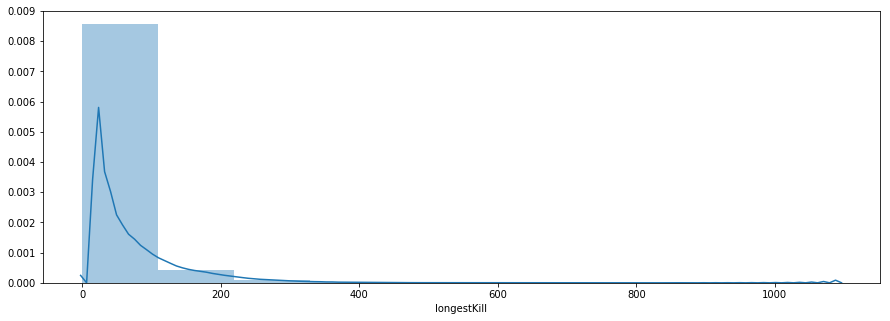

In [20]:
plt.figure(figsize=(15, 5))
sns.distplot(train['longestKill'], bins=10)

most kills happened within 500 meters

In [21]:
display(train[train['longestKill'] >= 1000].shape)
train[train['longestKill'] >= 1000].head(10)

(20, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,num_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsAndBoosts,totalDistance,killsWithoutMoving,headshot_rate
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,0.9231,88,4.48,877.968,30.24,2087.68,4,3775.20,False,0.250000
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0.5385,29,18.81,2195.640,23.94,2236.68,7,48.87,False,0.454545
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,1.0000,51,14.90,1531.720,19.37,1040.02,0,2981.00,False,0.000000
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.0,17,5,0,3,...,0.6000,41,25.44,2241.900,9.54,1734.69,0,29.21,False,0.312500
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,...,0.0000,61,1.39,273.552,11.12,654.69,0,3159.00,False,0.000000
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,...,0.9091,86,11.40,1153.680,13.68,1163.94,0,569.50,False,0.500000
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,45,...,0.2857,58,4.26,467.606,11.36,825.02,3,832.50,False,0.000000
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,0.9412,52,22.20,2427.200,76.96,1827.80,6,2848.00,False,0.466667
1642712,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.0,0,4,11,11,...,0.5000,28,39.56,3617.160,25.80,3092.56,13,235.30,False,0.173913
2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.0,0,6,5,15,...,0.6000,42,17.38,2057.160,17.38,2834.52,8,133.20,False,0.545455


In [13]:
# remove outliers
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)

### Anomlies in traveling

In [23]:
train[['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance']].describe()

,walkDistance,rideDistance,swimDistance,totalDistance
count,4.445312e+06,4.445312e+06,4.445312e+06,4.445312e+06
mean,1.154628e+03,6.063271e+02,4.510976e+00,1.765466e+03
std,1.183514e+03,1.498567e+03,3.050772e+01,2.183257e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.554000e+02,0.000000e+00,0.000000e+00,1.584000e+02
50%,6.863500e+02,0.000000e+00,0.000000e+00,7.893000e+02
75%,1.977000e+03,2.605250e-01,0.000000e+00,2.729000e+03
max,2.578000e+04,4.071000e+04,3.823000e+03,4.127010e+04


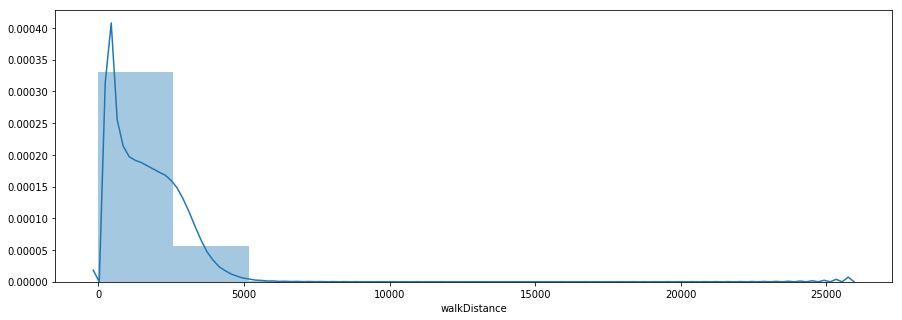

In [24]:
# walkDistance
plt.figure(figsize=(15, 5))
sns.distplot(train['walkDistance'], bins=10)

In [25]:
display(train[train['walkDistance'] >= 10000].shape)
train[train['walkDistance'] >= 10000].head(10)

(219, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,num_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsAndBoosts,totalDistance,killsWithoutMoving,headshot_rate
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.00,0,0,0,44,...,0.8163,99,0.00,0.0000,99.99,1925.06,1,13540.3032,False,0.0
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3,23.22,0,0,1,34,...,0.9474,65,0.00,31.3470,27.00,2668.95,4,10070.9073,False,0.0
49312,582685f487f0b4,338112cd12f1e7,d0afbf5c3a6dc9,0,4,117.20,1,0,1,24,...,0.9130,94,1.06,124.2320,49.82,2323.52,5,12446.7588,False,0.0
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1,32.34,0,0,1,46,...,0.8333,96,0.00,33.6336,50.96,1909.44,2,12483.6200,False,0.0
94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1,73.08,0,0,3,27,...,0.8194,73,0.00,92.8116,92.71,2293.62,4,11490.6300,False,0.0
125103,db5a0cdc969dcb,50cc466757950e,c306a9745c4c1d,0,4,37.73,0,0,7,47,...,0.7340,95,0.00,39.6165,99.75,2054.85,11,12828.7978,False,0.0
136421,955e60b09a96b1,30df08fe22a901,8669d01725f135,0,1,0.00,0,0,1,46,...,0.6957,94,0.00,0.0000,49.82,2091.38,2,12223.8100,False,0.0
136476,0d75d05b5c988c,3da040ce77cd0b,65bc5211a569dd,0,3,0.00,0,0,0,41,...,0.9333,91,0.00,0.0000,99.19,2028.49,3,14918.2000,False,0.0
154080,7e8a71d23381cd,e2c9f4f92840b2,a721de1aa05408,0,3,0.00,0,0,13,46,...,0.8602,94,0.00,0.0000,99.64,2038.38,16,12636.7000,False,0.0
154128,32fdde4c716787,390ae9a51c11b8,82610ed1b4d033,0,4,52.16,0,0,7,25,...,0.8936,95,1.05,54.7680,50.40,1927.80,11,10889.8614,False,0.0


In [14]:
# remove outliers
train.drop(train[train['walkDistance'] >= 10000].index, inplace=True)

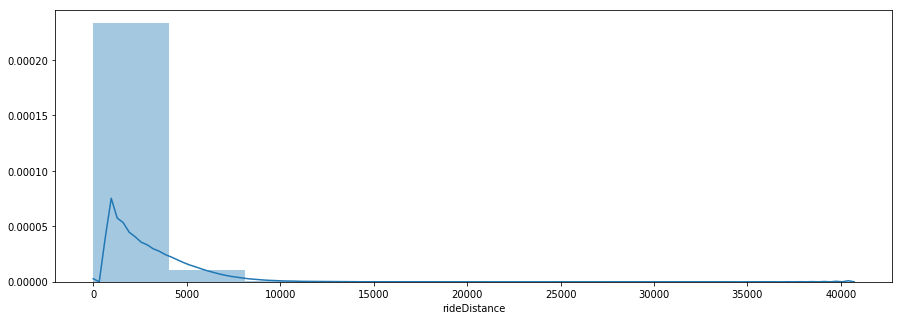

In [27]:
# rideDistance
plt.figure(figsize=(15, 5))
sns.distplot(train['rideDistance'], bins=10)

In [28]:
display(train[train['rideDistance'] >= 20000].shape)
train[train['rideDistance'] >= 20000].head(10)

(150, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,num_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsAndBoosts,totalDistance,killsWithoutMoving,headshot_rate
28588,6260f7c49dc16f,b24589f02eedd7,6ebea3b4f55b4a,0,0,99.20,0,0,1,30,...,0.6421,96,1.04,103.1680,99.84,1969.76,1,26306.60,False,0.000000
63015,adb7dae4d0c10a,8ede98a241f30a,8b36eac66378e4,0,0,0.00,0,0,0,55,...,0.5376,94,0.00,0.0000,99.64,2004.46,0,22065.40,False,0.000000
70507,ca6fa339064d67,f7bb2e30c3461f,3bfd8d66edbeff,0,0,100.00,0,0,0,26,...,0.8878,99,1.01,101.0000,99.99,1947.28,0,28917.50,False,0.000000
72763,198e5894e68ff4,ccf47c82abb11f,d92bf8e696b61d,0,0,0.00,0,0,0,46,...,0.7917,97,0.00,0.0000,99.91,1861.21,0,21197.20,False,0.000000
95276,c3fabfce7589ae,15529e25aa4a74,d055504340e5f4,0,7,778.20,0,1,2,2,...,0.9785,94,7.42,824.8920,99.64,1986.44,9,26733.20,False,0.142857
140097,9944fbbea2b91e,18b4d5f4bb1906,d9d4a3e50cae75,1,0,12.55,0,0,0,53,...,0.5000,89,0.00,13.9305,98.79,2107.89,0,21293.23,False,0.000000
297186,88904c200175b6,012a61a01e146e,7a270c25e9b70c,0,1,0.00,0,0,1,47,...,0.7447,96,0.00,0.0000,49.92,1995.76,2,29267.30,False,0.000000
371098,f7071357f6b762,f3ee20821f4627,ac47c86bf385bf,0,0,72.92,1,0,0,45,...,0.6875,96,0.00,75.8368,50.96,1953.12,0,21942.10,False,0.000000
403647,c65da7b3fceef5,814d1b3736e276,ff9f570b555d48,0,2,0.00,0,0,3,54,...,0.6739,94,0.00,0.0000,49.82,1930.26,5,21198.20,False,0.000000
426708,149e224a2330ae,6d8cb80b3de8ff,f8b8e2643f60ee,0,2,0.00,0,0,2,43,...,0.8171,83,0.00,0.0000,97.11,2348.19,4,32362.10,False,0.000000


In [15]:
# remove outliers
train.drop(train[train['rideDistance'] >= 20000].index, inplace=True)

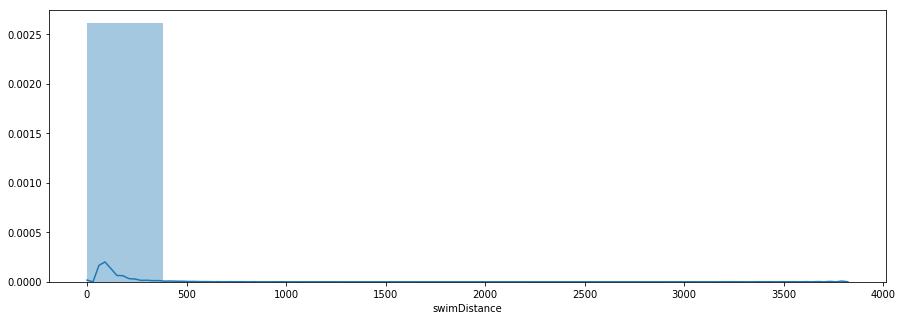

In [30]:
# swimDistance
plt.figure(figsize=(15, 5))
sns.distplot(train['swimDistance'], bins=10)

In [31]:
display(train[train['swimDistance'] >= 2000].shape)
train[train['swimDistance'] >= 2000].head(10)

(12, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,num_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsAndBoosts,totalDistance,killsWithoutMoving,headshot_rate
177973,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5,78.12,1,0,1,47,...,0.9592,98,0.00,79.6824,51.00,1426.98,6,3297.000,False,0.000000
274258,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4,53.32,0,0,16,39,...,0.9600,94,0.00,56.5192,27.56,2319.28,20,10113.000,False,0.000000
1005337,d50c9d0e65fe2a,4996575c11abcb,668402592429f8,0,1,503.00,4,3,1,6,...,1.0000,88,3.36,563.3600,29.12,2124.64,2,10740.000,False,1.000000
1195818,f811de9de80b70,d08ddf7beb6252,8a48703ab52ec8,0,7,352.30,3,1,6,4,...,1.0000,98,5.10,359.3460,49.98,1423.92,13,3083.100,False,0.200000
1227362,a33e917875c80e,5b72674b42712b,5fb0d8b1fc16cf,0,1,589.20,3,1,1,46,...,1.0000,86,2.28,671.6880,13.68,1163.94,2,4818.300,False,0.500000
1889163,bd8cc3083a9923,1d5d17140d6fa4,8e2e6022d6e5c8,0,0,0.00,0,0,0,47,...,0.5833,87,0.00,0.0000,28.25,1567.31,0,5314.000,False,0.000000
2065940,312ccbb27b99aa,47c7f4d69e2fb1,b4b11756321f3a,1,3,49.59,0,0,5,48,...,0.8511,96,0.00,51.5736,49.92,1434.16,8,9899.000,False,0.000000
2327586,8773d0687c6aae,b17f46f9f6666c,56ee5897512c86,3,1,474.40,2,0,0,7,...,1.0000,91,3.27,517.0960,29.43,1318.90,1,2394.546,False,0.000000
2784855,a8653b87e83892,383db055216ec2,d6e13468e28ab4,1,4,843.80,5,5,2,2,...,0.9600,94,7.42,894.4280,27.56,2319.28,6,9926.000,False,0.714286
3359439,3713b36e1ba9e1,1f7aed9240864a,584447ed875c85,0,0,0.00,0,0,0,77,...,0.2143,96,0.00,0.0000,30.16,1426.88,0,4088.000,False,0.000000


In [16]:
# remove outliers
train.drop(train[train['swimDistance'] >= 2000].index, inplace=True)

### Anomalies in supplies (weaponsAcquired)

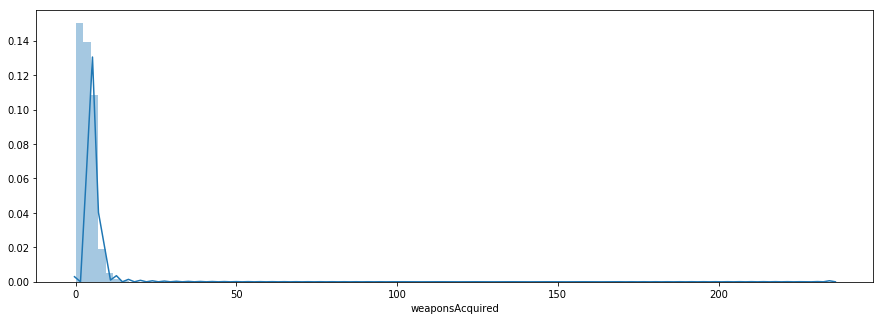

In [33]:
plt.figure(figsize=(15, 5))
sns.distplot(train['weaponsAcquired'], bins=100)

most players acquired less than 10 weapons

In [34]:
display(train[train['weaponsAcquired'] >= 80].shape)
train[train['weaponsAcquired'] >= 80].head(10)

(19, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,num_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsAndBoosts,totalDistance,killsWithoutMoving,headshot_rate
233643,7c8c83f5f97d0f,b33b210a52a2f8,2e8a0917a71c43,0,0,67.11,0,0,0,44,...,0.7111,91,0.00,73.1499,50.14,2072.09,0,3187.00,False,0.000000
588387,c58e3e0c2ba678,3d3e6100c07ff0,d04dbb98249f76,0,1,175.30,1,0,2,48,...,0.7500,98,0.00,178.8060,29.58,1399.44,3,1687.00,False,0.000000
1437471,8f0c855d23e4cd,679c3316056de8,fbaf1b3ae1d884,1,0,100.00,0,0,0,24,...,0.8929,97,1.03,103.0000,29.87,1895.20,0,5299.21,False,0.000000
1449293,db54cf45b9ed1c,898fccaeeb041d,484b4ae51fe80f,0,0,0.00,0,0,0,54,...,0.5600,80,0.00,0.0000,31.20,1596.00,0,653.10,False,0.000000
1592744,634a224c53444e,75fa7591d1538c,f900de1ec39fa5,9,0,1726.00,0,3,0,9,...,0.2000,11,43.47,3262.1400,20.79,3398.22,0,2888.80,False,0.130435
1834515,e927e9020f7e0d,60d6b714a7308f,8e265af296007b,1,1,26.46,0,0,1,51,...,0.9200,95,0.00,27.7830,27.30,1502.55,2,2835.00,False,0.000000
2373240,a8c150d5d3d3e2,6e1c8c5f91e060,f900de1ec39fa5,12,0,1746.00,0,1,1,11,...,0.0000,11,30.24,3299.9400,20.79,3398.22,1,275.90,False,0.062500
2442962,438cabaa5dfbdd,596c155c524725,8e0bbeec19a929,0,0,0.00,0,0,0,56,...,0.5000,91,0.00,0.0000,29.43,1278.57,0,807.60,False,0.000000
2743408,afcb46681b909f,3715298b7eea9c,4dd4d42772464f,0,4,186.90,2,0,2,18,...,0.7955,90,2.20,205.5900,49.50,1662.10,6,3318.00,False,0.000000
2749693,940b52bf12805a,4757d102ca4fbf,7ecae2cedc064f,1,3,378.90,2,0,5,7,...,0.8846,98,3.06,386.4780,27.54,1428.00,8,3641.70,False,0.000000


In [17]:
# remove outliers
train.drop(train[train['weaponsAcquired'] >= 80].index, inplace=True)

### Anomalies in supplies (heals)

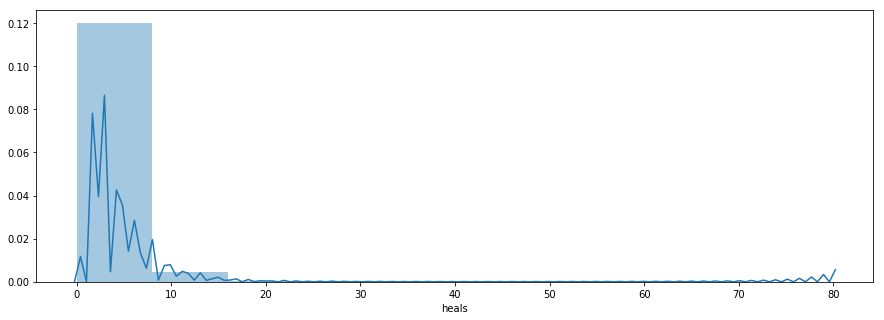

In [36]:
plt.figure(figsize=(15, 5))
sns.distplot(train['heals'], bins=10)

In [37]:
display(train[train['heals'] >= 40].shape)
train[train['heals'] >= 40].head(10)

(135, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,num_players,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsAndBoosts,totalDistance,killsWithoutMoving,headshot_rate
18405,63ab976895d860,927eeba5614c4f,69473402649f11,0,2,0.0,0,0,47,43,...,0.9368,96,0.00,0.00,99.84,1868.88,49,6854.000,False,0.000000
54463,069ddee7c9d26a,58ab5a1ce8e06f,942416b6caf21e,1,4,182.0,0,1,43,21,...,0.9615,93,1.07,194.74,28.89,1639.24,47,3083.400,False,1.000000
126439,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2,0.0,0,0,52,49,...,0.8333,97,0.00,0.00,99.91,1415.22,54,1343.443,False,0.000000
259351,86910c38335c2f,2738398928d28c,7d2911e944bfaa,0,10,0.0,0,0,42,45,...,0.8646,97,0.00,0.00,99.91,1822.07,52,7444.000,False,0.000000
268747,a007734fbc6ebf,5bf702dfa1e5d4,ad6b5669d33a2c,0,5,0.0,0,0,48,43,...,0.8370,93,0.00,0.00,99.51,2009.46,53,5816.000,False,0.000000
269098,a0891dbc2950ea,dde848d90491ba,b4fd3348551b73,0,2,0.0,0,0,42,44,...,0.9259,97,0.00,0.00,28.84,1333.85,44,2439.000,False,0.000000
284195,91a2fb00455eb3,f639b09774c5b1,65b73c71653822,0,3,123.0,0,0,40,52,...,0.8276,99,0.00,124.23,30.30,1984.65,43,4848.000,False,0.000000
300204,1f4f2efc86bfcb,3d668492d1fca9,d3638466a43d38,0,6,175.0,2,1,47,25,...,0.9355,95,1.05,183.75,33.60,1425.90,53,3415.600,False,1.000000
349908,7725ad71ad2ff7,4b2a7cf86d1546,cfa2775c9ef944,3,0,2348.0,0,8,41,9,...,0.8889,41,42.93,3733.32,58.83,2857.23,41,268.800,False,0.296296
375156,d64866c78ebcb0,aa0f089ae6430c,4dbc4ebba33ec6,0,7,278.5,3,1,44,3,...,0.9630,94,4.24,295.21,29.68,1915.42,51,4927.000,False,0.250000


In [18]:
# remove outliers
train.drop(train[train['heals'] >= 40].index, inplace=True)

In [19]:
train.shape

(4444776, 38)

## Categorical Variables

In [40]:
print('There are {} different Match types in the dataset.'
     .format(train['matchType'].nunique()))

There are 16 different Match types in the dataset.


In [20]:
# one hot encode matchType
train = pd.get_dummies(train, columns=['matchType'])

# take a look
matchType_encoding = train.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
# turn groupId, matchId into categorical types
train['groupId'] = train['groupId'].astype('category')
train['matchId'] = train['matchId'].astype('category')

# get category coding for groupId, matchId
train['groupId_cat'] = train['groupId'].cat.codes
train['matchId_cat'] = train['matchId'].cat.codes

# get rid of old columns
train.drop(columns=['groupId', 'matchId'], inplace=True)

train[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,613591,30085
1,827582,32751
2,843273,3143
3,1340072,45260
4,1757338,20531


In [22]:
# drop Id column
train.drop(columns=['Id'], inplace=True)

## Preparation for Machine Learning

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train = train.drop(columns=['winPlacePerc'])
y_train = train['winPlacePerc']

del train

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [64]:
# kfold = StratifiedKFold(n_splits=10)

In [67]:
# classifier = RandomForestRegressor()

# cv_results = cross_val_score(classifier, X_train, y=y_train, scoring='mean_absolute_error', cv=kfold)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [27]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (3555820, 51)
y_train shape: (3555820,)
X_test shape: (888956, 51)
y_test shape: (888956,)


In [28]:
from sklearn.metrics import mean_absolute_error

def print_score(m: RandomForestRegressor):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train),
           'mae val: ', mean_absolute_error(m.predict(X_test), y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [29]:
# base model
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', n_jobs=2)
m1.fit(X_train, y_train)
print_score(m1)

['mae train: ', 0.03689266304509372, 'mae val: ', 0.058645499427576415]


### Feature Importance

In [30]:
# top 10 most predictive features
importances = pd.DataFrame(m1.feature_importances_, index=X_train.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
importances = importances.reset_index()

importances[:10]

,index,importance
0,killPlace,0.252669
1,totalDistance,0.201461
2,walkDistance,0.167297
3,weaponsAcquired,0.069764
4,boosts,0.063264
5,killsNorm,0.027919
6,heals,0.026333
7,healsAndBoosts,0.024078
8,kills,0.018725
9,longestKill,0.016475


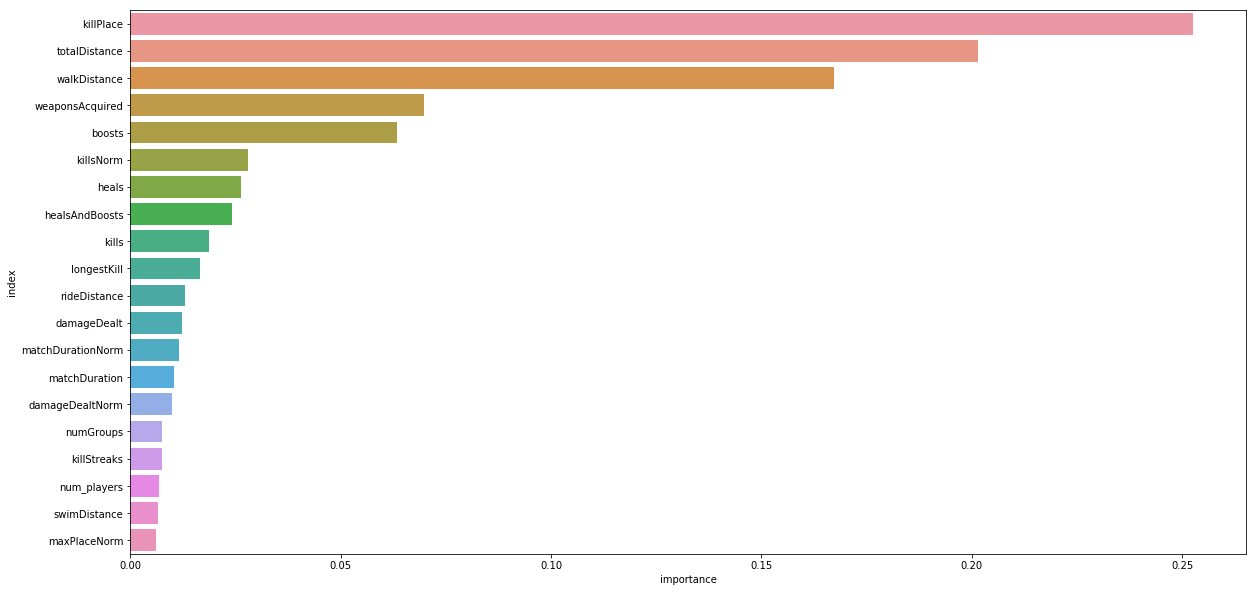

In [31]:
plt.figure(figsize=(20, 10))
sns.barplot(data=importances[:20], x='importance', y='index')

In [32]:
# keep significant features
to_keep = importances[importances['importance'] >= 0.005]
print('Significant features:', len(to_keep))
to_keep

Significant features: 21


,index,importance
0,killPlace,0.252669
1,totalDistance,0.201461
2,walkDistance,0.167297
3,weaponsAcquired,0.069764
4,boosts,0.063264
5,killsNorm,0.027919
6,heals,0.026333
7,healsAndBoosts,0.024078
8,kills,0.018725
9,longestKill,0.016475


In [33]:
X_train = X_train[to_keep['index']]
X_test = X_test[to_keep['index']]

## Second Random Forest Model

In [34]:
# train with significant features only
m2 = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features='sqrt', n_jobs=2)
m2.fit(X_train, y_train)
print_score(m2)

['mae train: ', 0.036031035363690435, 'mae val: ', 0.05735875526851558]


In [35]:
importances_to_keep = pd.DataFrame(m2.feature_importances_, index=to_keep['index'],
                           columns=['importance']).sort_values('importance', ascending=False)
importances_to_keep = importances_to_keep.reset_index()

importances_to_keep[:10]

,index,importance
0,walkDistance,0.246452
1,killPlace,0.216419
2,totalDistance,0.192820
3,weaponsAcquired,0.065013
4,boosts,0.061910
5,healsAndBoosts,0.048061
6,heals,0.025294
7,longestKill,0.023372
8,damageDealt,0.014883
9,matchDurationNorm,0.013451


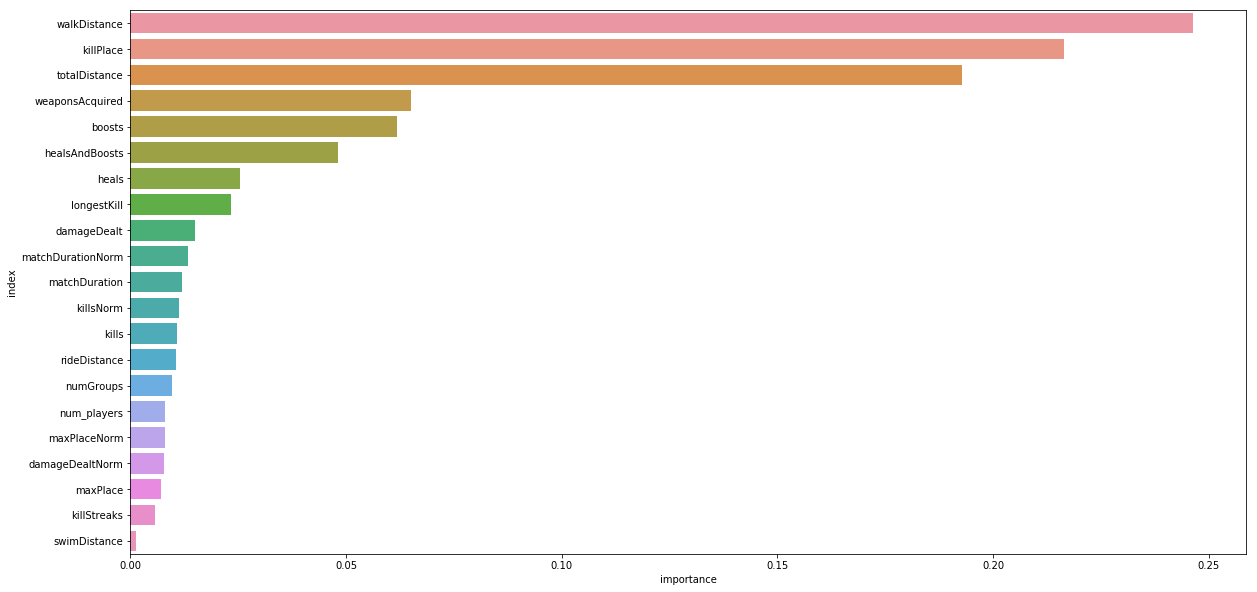

In [36]:
plt.figure(figsize=(20, 10))
sns.barplot(data=importances_to_keep, x='importance', y='index')

### Correlations

In [37]:
from scipy.cluster import hierarchy as hc
from scipy.stats import spearmanr

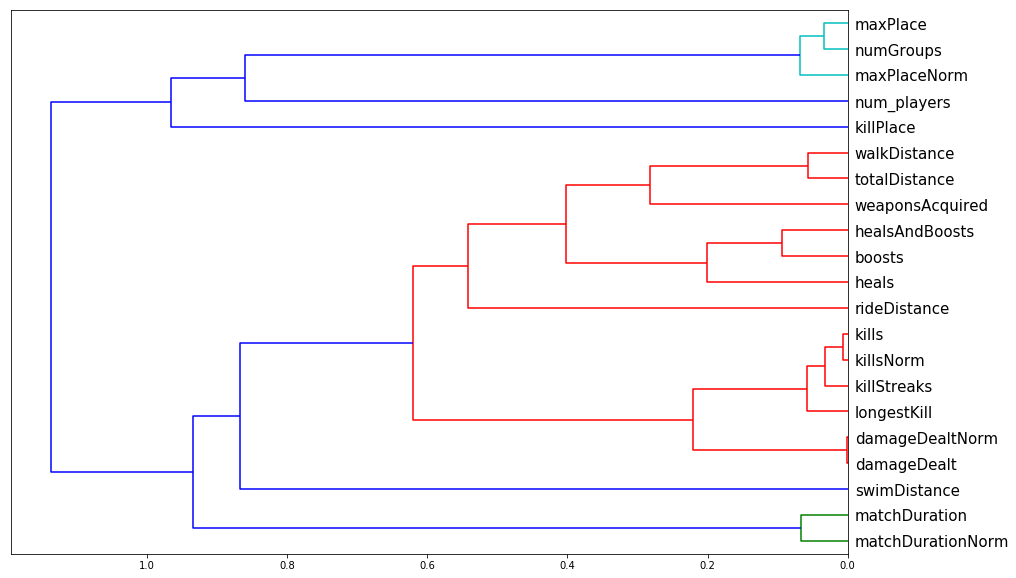

In [38]:
# Dendrogram
corr = np.round(spearmanr(X_train).correlation, 4)
corr_condensed = hc.distance.squareform(1 - corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(15, 10))
dendrogram = hc.dendrogram(z, labels=X_train.columns, orientation='left', leaf_font_size=15)

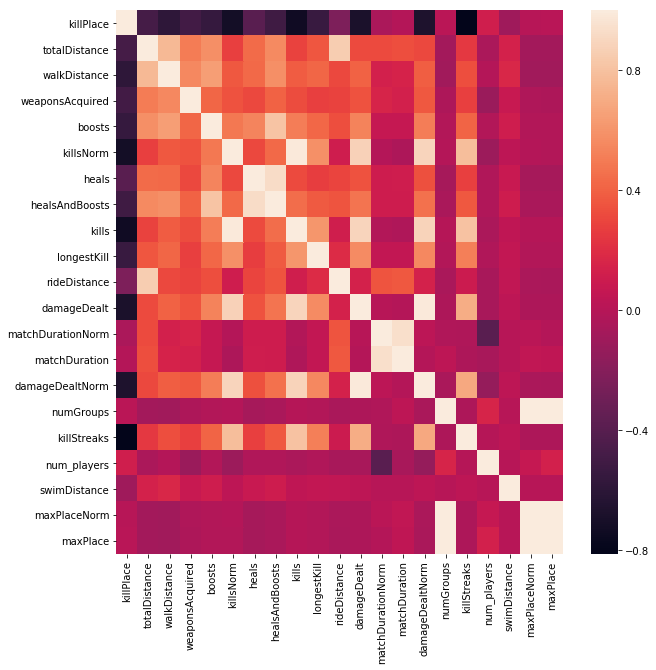

In [39]:
# correlation heatmap
corr = X_train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr)

In [51]:
from sklearn.externals import joblib

In [52]:
joblib.dump(m2, 'first_model.joblib.pkl', compress=9)

['first_model.joblib.pkl']

In [56]:
# apply feature engineering to the test set
test = pd.read_csv('test_V2.csv')
test['headshot_rate'] = test['headshotKills'] / test['kills']
test['headshot_rate'] = test['headshot_rate'].fillna(0)
test['totalDistance'] = test['rideDistance'] + test['walkDistance'] + test['swimDistance']
test['num_players'] = test.groupby('matchId')['matchId'].transform('count')
# normalize
test['killsNorm'] = test['kills']*((100-test['num_players'])/100 + 1)
test['damageDealtNorm'] = test['damageDealt']*((100-test['num_players'])/100 + 1)
test['maxPlaceNorm'] = test['maxPlace']*((100-test['num_players'])/100 + 1)
test['matchDurationNorm'] = test['matchDuration']*((100-test['num_players'])/100 + 1)
test['healsAndBoosts'] = test['heals'] + test['boosts']
test['killsWithoutMoving'] = ((test['kills'] > 0) & (test['totalDistance'] == 0))

# turn groupId, matchId into categorical types
test['groupId'] = test['groupId'].astype('category')
test['matchId'] = test['matchId'].astype('category')

# Get category coding for groupId and matchID
test['groupId_cat'] = test['groupId'].cat.codes
test['matchId_cat'] = test['matchId'].cat.codes

# Remove irrelevant features from the test set
test_pred = test[to_keep['index']].copy()

# Fill NaN with 0 (temporary)
test_pred.fillna(0, inplace=True)
test_pred.head()

,killPlace,totalDistance,walkDistance,weaponsAcquired,boosts,killsNorm,heals,healsAndBoosts,kills,longestKill,...,damageDealt,matchDurationNorm,matchDuration,damageDealtNorm,numGroups,killStreaks,num_players,swimDistance,maxPlaceNorm,maxPlace
0,73,588.0,588.0,1,0,0.00,0,0,0,0.00,...,51.46,2034.72,1884,55.5768,28,0,92,0.0,30.24,28
1,11,6686.0,2017.0,6,4,2.08,2,6,2,361.90,...,179.10,1883.44,1811,186.2640,47,1,96,0.0,49.92,48
2,49,787.8,787.8,4,0,0.00,4,4,0,0.00,...,23.40,1900.58,1793,24.8040,27,0,94,0.0,29.68,28
3,54,1812.0,1812.0,3,0,0.00,0,0,0,0.00,...,65.52,2035.74,1834,72.7272,44,0,89,0.0,49.95,45
4,7,2963.0,2963.0,4,4,3.15,1,5,3,60.06,...,330.20,1392.30,1326,346.7100,27,1,95,0.0,29.40,28


In [57]:
# submission
predictions = np.clip(a=m2.predict(test_pred), a_min=0.0, a_max=1.0)
pred_df = pd.DataFrame({'Id': test['Id'], 'winPlacePerc': predictions})

pred_df.to_csv('submission.csv', index=False)

In [58]:
print('Head of submission: ')
display(pred_df.head())
print('Tail of submission: ')
display(pred_df.tail())

Head of submission: 


,Id,winPlacePerc
0,9329eb41e215eb,0.205147
1,639bd0dcd7bda8,0.905415
2,63d5c8ef8dfe91,0.660507
3,cf5b81422591d1,0.543563
4,ee6a295187ba21,0.926541


Tail of submission: 


,Id,winPlacePerc
1934169,a316c3a13887d5,0.715759
1934170,5312146b27d875,0.416966
1934171,fc8818b5b32ad3,0.895803
1934172,a0f91e35f8458f,0.817059
1934173,3696fc9f3a42b2,0.038283
